In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
to_numeric = CountVectorizer()

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
to_numeric_tfidf = TfidfVectorizer()

In [4]:
df = pd.read_table('sms.tsv',header=None,names=['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df['label_num'] = df['label'].map({'ham':0,'spam':1})

In [7]:
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
X = df['message']
y = df['label_num']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

In [12]:
to_numeric_tfidf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [13]:
print('X_Train : ',X_train.shape)
print('y_Train : ',y_train.shape)
print('X_Test : ',X_test.shape)
print('y_Test : ',y_test.shape)

X_Train :  (4179,)
y_Train :  (4179,)
X_Test :  (1393,)
y_Test :  (1393,)


In [14]:
to_numeric = CountVectorizer()

In [15]:
# Create voccabulary
to_numeric.fit(X_train)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [16]:
to_numeric.transform(X_train)

<4179x7535 sparse matrix of type '<class 'numpy.int64'>'
	with 56144 stored elements in Compressed Sparse Row format>

In [17]:
X_train_DTM = pd.DataFrame(to_numeric.transform(X_train).toarray(),columns=to_numeric.get_feature_names())
X_train_DTM.head()

,00,000,000pes,008704050406,0089,0121,01223585236,0125698789,02,0207,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_test_DTM = pd.DataFrame(to_numeric.transform(X_test).toarray(),columns=to_numeric.get_feature_names())
X_train_DTM.head()

,00,000,000pes,008704050406,0089,0121,01223585236,0125698789,02,0207,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [20]:
nb.fit(X_train_DTM,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
y_pred = nb.predict(X_test_DTM)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [23]:
confusion_matrix(y_test,y_pred)

array([[1194,    7],
       [  18,  174]], dtype=int64)

In [24]:
accuracy_score(y_test,y_pred)

0.9820531227566404

In [25]:
precision_score(y_test,y_pred)

0.9613259668508287

In [26]:
recall_score(y_test,y_pred)

0.90625

In [27]:
y_pred_proba = nb.predict_proba(X_test_DTM)[:,1]

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9922894116014432

# Fine Tune vectorizer


In [29]:
to_numeric = CountVectorizer() 
to_numeric.fit(X_train)
len(to_numeric.get_feature_names())

7535

In [30]:
to_numeric = TfidfVectorizer(ngram_range=(1,2)) 
to_numeric.fit(X_train)
len(to_numeric.get_feature_names())

41571

In [31]:
# Word cloud


In [32]:
!pip install wordcloud

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
wc = WordCloud()

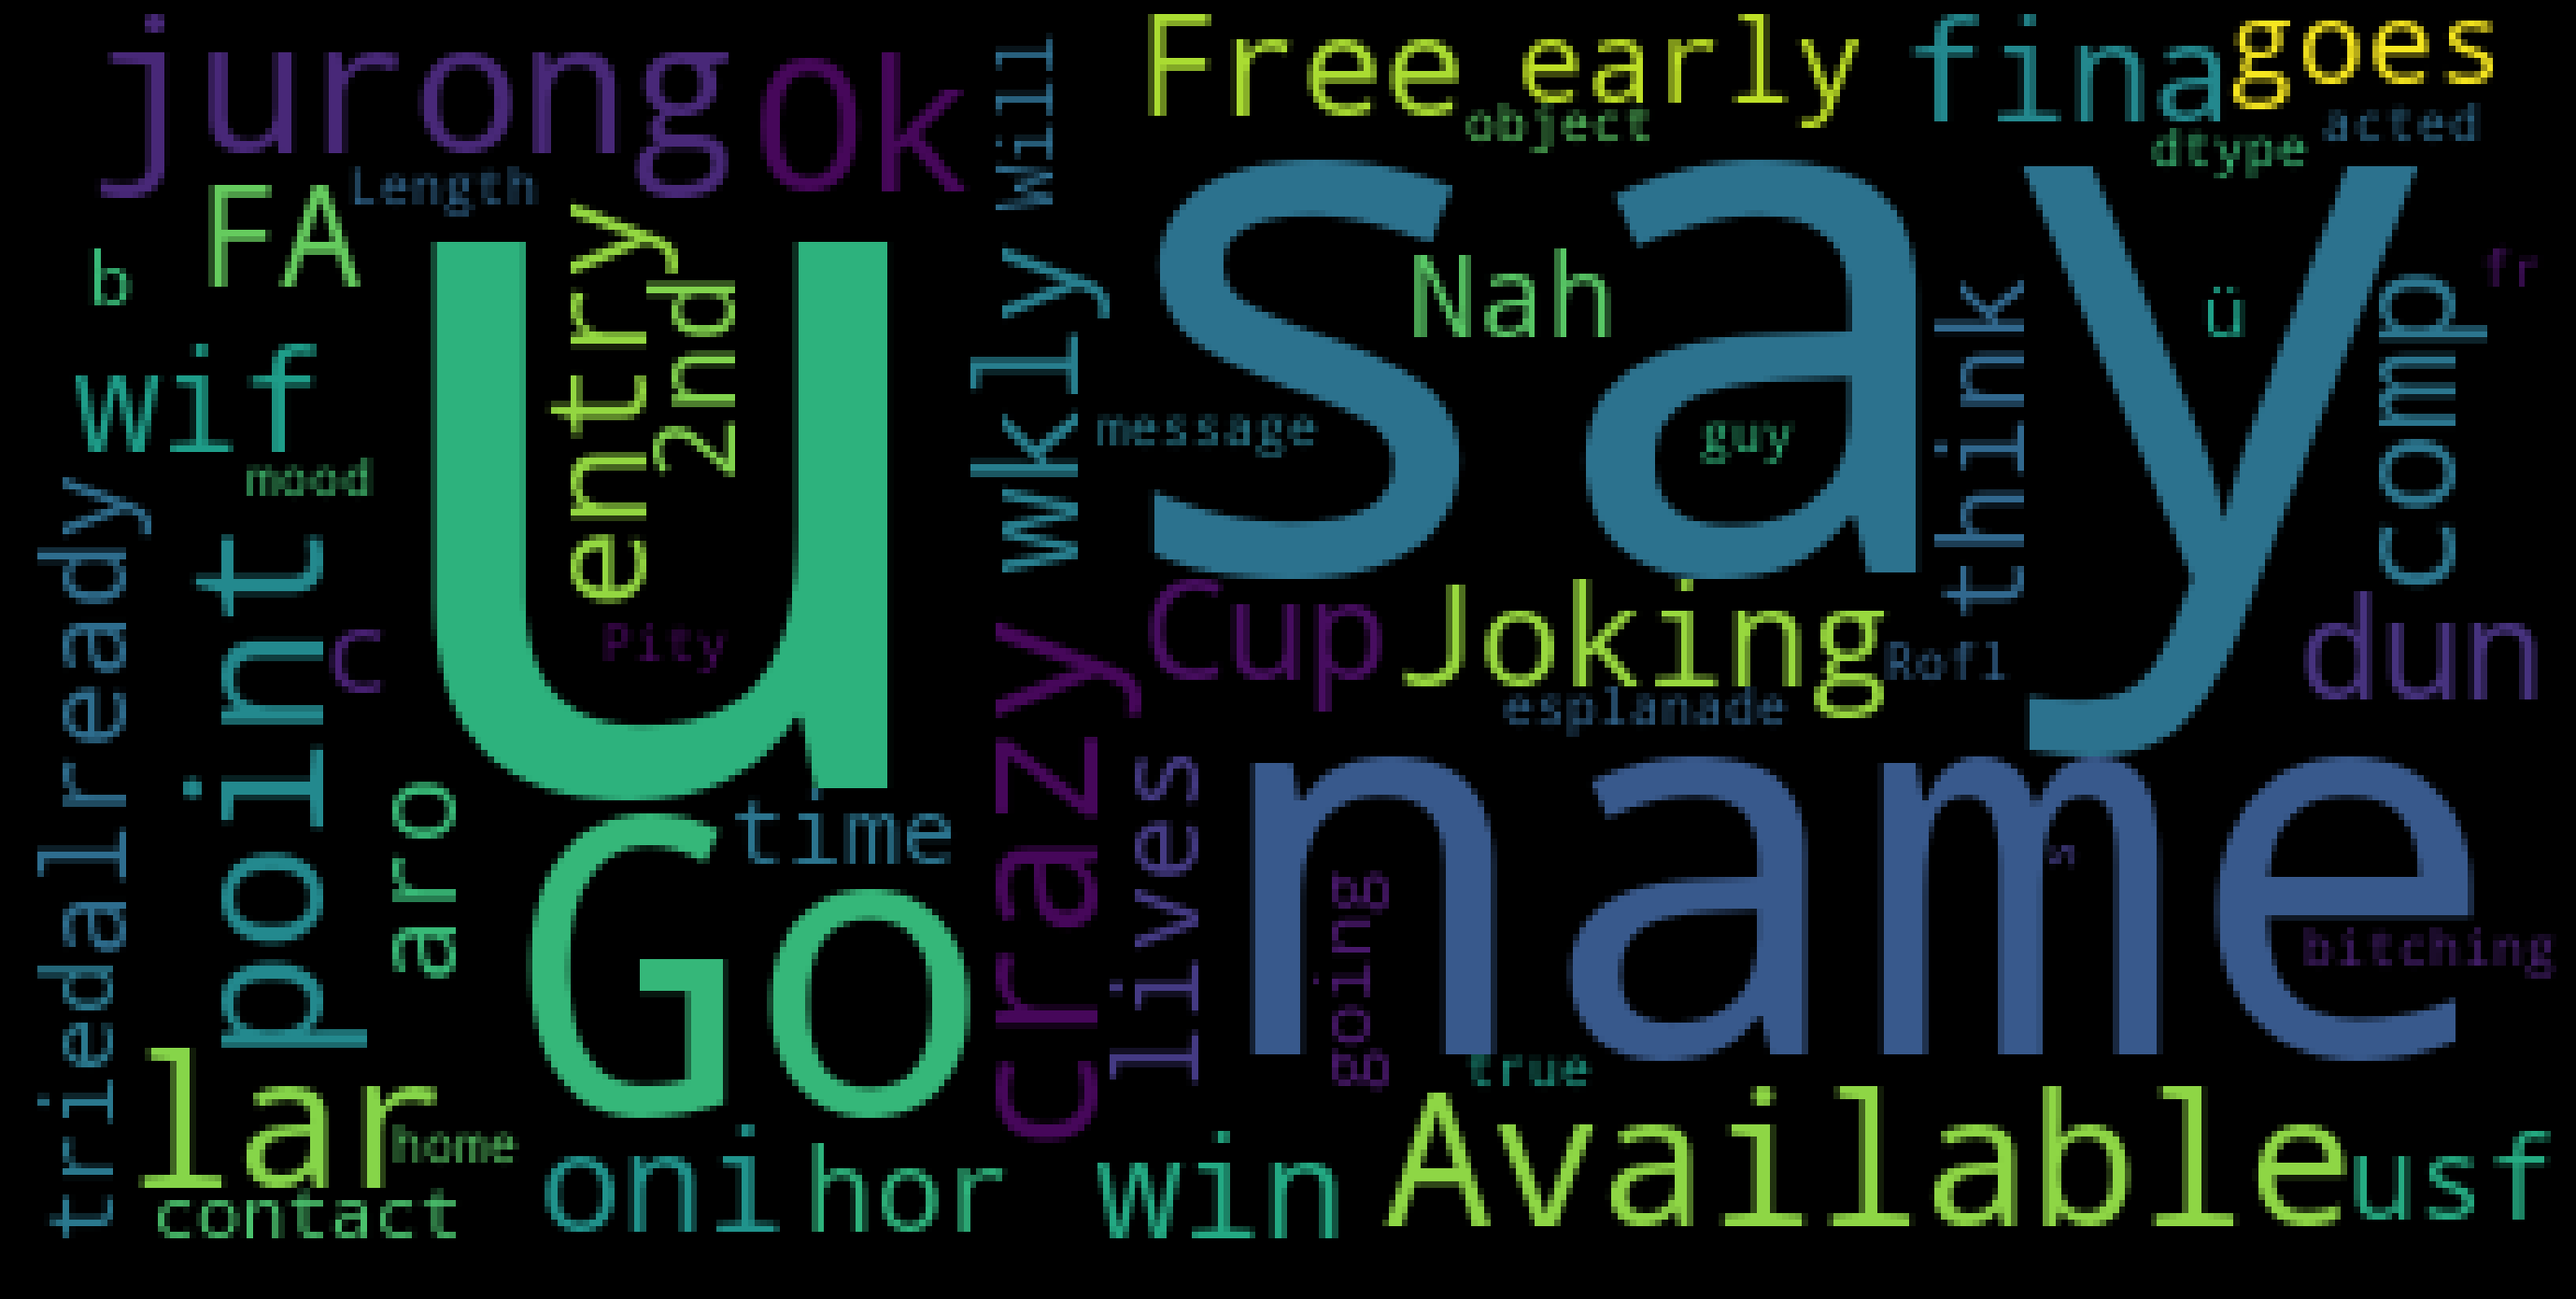

In [35]:
wc.generate(str(df['message']))
plt.figure(figsize=(50,25),facecolor='k')
plt.imshow(wc)
plt.show()

In [36]:
df.message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [37]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [49]:
!pip install textblob

In [50]:
from textblob import TextBlob

In [77]:
sent = 'I Dont Hate you'
res = TextBlob(sent)

In [78]:
res.sentiment.polarity

-0.8

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gagan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [40]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [41]:
sentence = 'pythoners are very inteligent and work very pythonly and now they are pythoning thier way to success'

In [46]:
def stem_tokenize(sentence):
    token_words = word_tokenize(sentence)
    stem_sent = []
    for word in token_words:
        stem_sent.append(porter.stem(word))
        stem_sent.append(" ")
    return "".join(stem_sent)
x = stem_tokenize(sentence)
print(x)


python are veri intelig and work veri pythonli and now they are python thier way to success 
